In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\devas\Desktop\jupyter project\data_core.csv")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37.0,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12.0,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7.0,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22.0,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35.0,0,0,Urea


In [2]:
df.shape

(8000, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         7998 non-null   float64
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 562.6+ KB


In [4]:
df.nunique()

Temparature        1816
Humidity           3004
Moisture           3723
Soil Type             5
Crop Type            11
Nitrogen             46
Potassium            24
Phosphorous          47
Fertilizer Name       7
dtype: int64

In [5]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,8000.000000,8000.000000,8000.000000,7998.000000,8000.000000,8000.000000
mean,30.338895,59.210731,43.580862,18.425606,3.916375,18.512500
std,4.478262,8.177366,12.596156,11.851037,5.494807,13.244113
min,20.000000,40.020000,20.000000,0.000000,0.000000,0.000000
25%,27.050000,53.277500,33.967500,9.000000,0.000000,8.000000
50%,30.240000,59.110000,42.250000,14.000000,1.000000,18.000000
75%,33.460000,65.082500,52.950000,26.000000,5.000000,30.000000
max,40.000000,80.000000,70.000000,46.000000,23.000000,46.000000


In [6]:

df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           2
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [7]:
df = df.dropna(axis = 0, how ='any')
print(df.isnull().sum())
df.shape

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


(7998, 9)

In [8]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [9]:
distribution = df['Humidity'].value_counts(normalize=True) * 100
distribution

Humidity
60.00    0.237559
58.00    0.212553
54.00    0.175044
62.00    0.162541
65.00    0.162541
           ...   
43.89    0.012503
47.65    0.012503
55.33    0.012503
62.58    0.012503
73.38    0.012503
Name: proportion, Length: 3004, dtype: float64

In [10]:
# Count duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()


Duplicate rows: 0


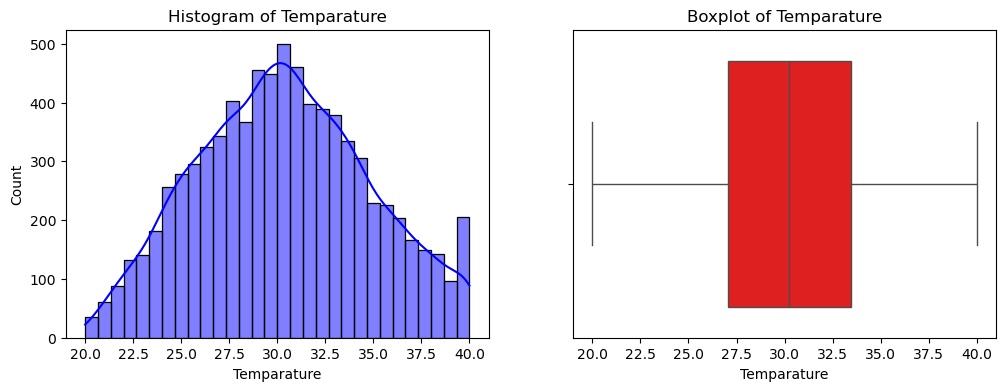

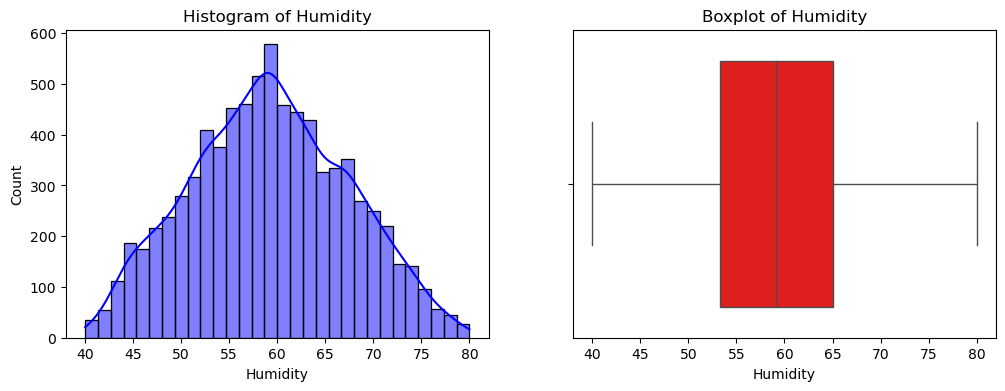

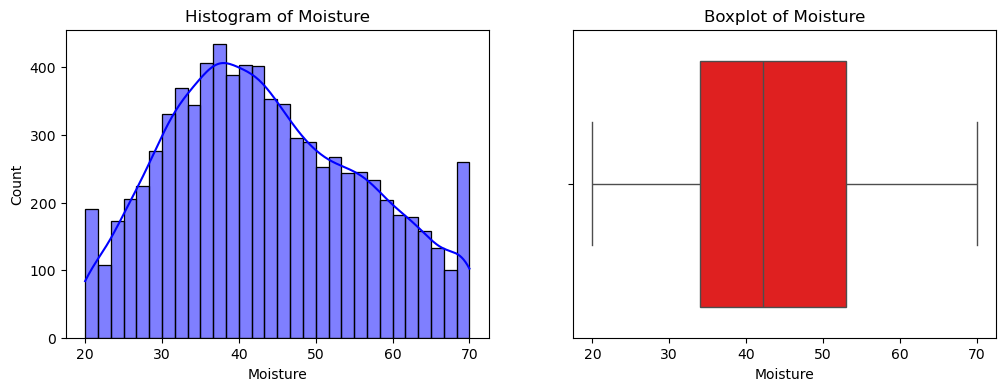

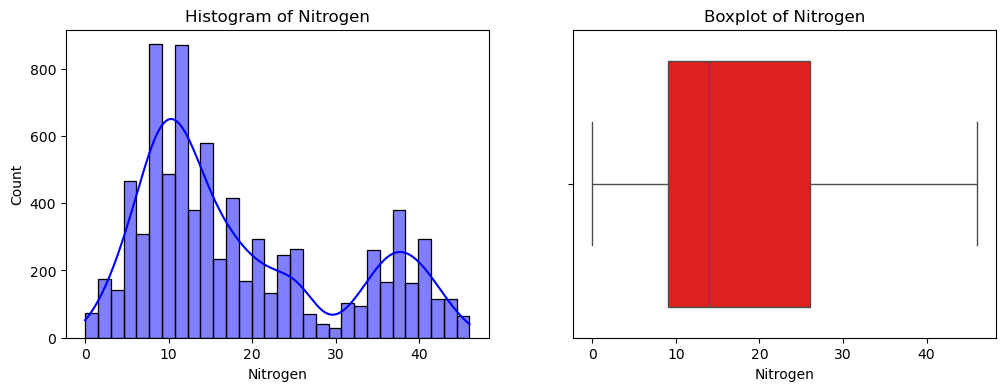

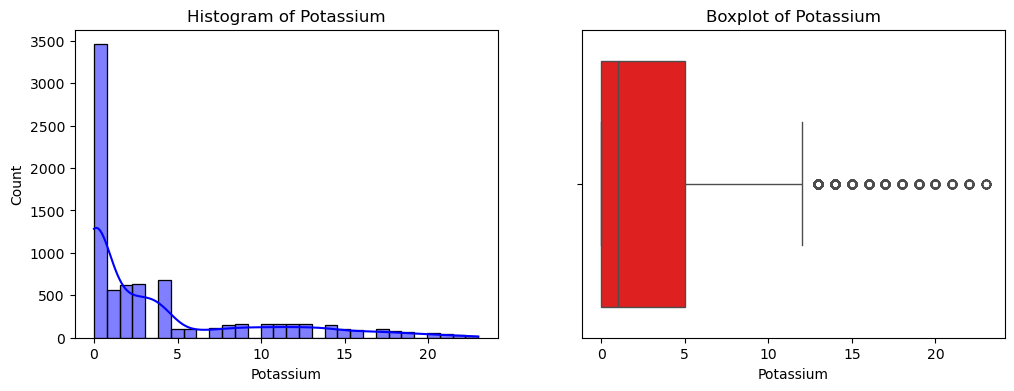

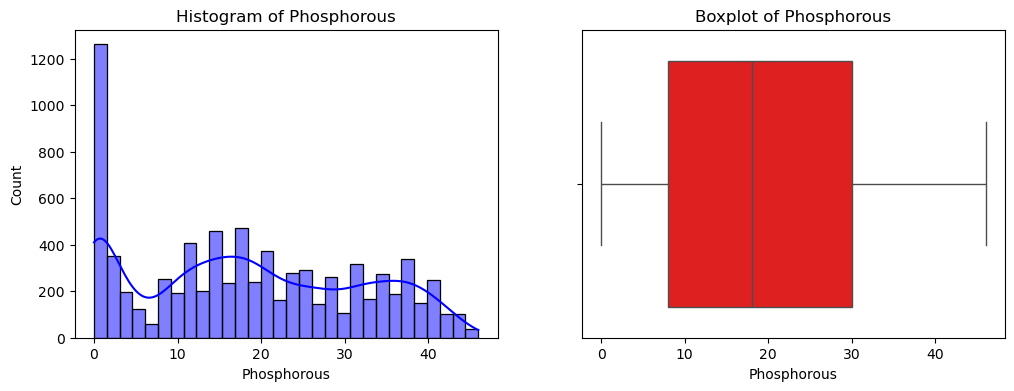

In [11]:

numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Histogram of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='red')
    plt.title(f"Boxplot of {col}")

    plt.show()


C:\Users\devas\AppData\Local\Temp\ipykernel_3556\987197310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


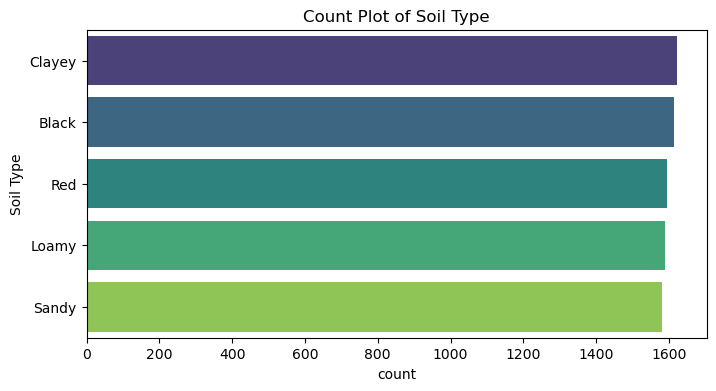

C:\Users\devas\AppData\Local\Temp\ipykernel_3556\987197310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


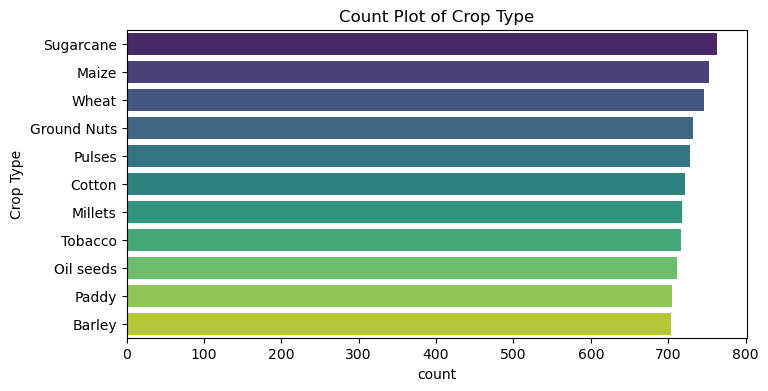

C:\Users\devas\AppData\Local\Temp\ipykernel_3556\987197310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


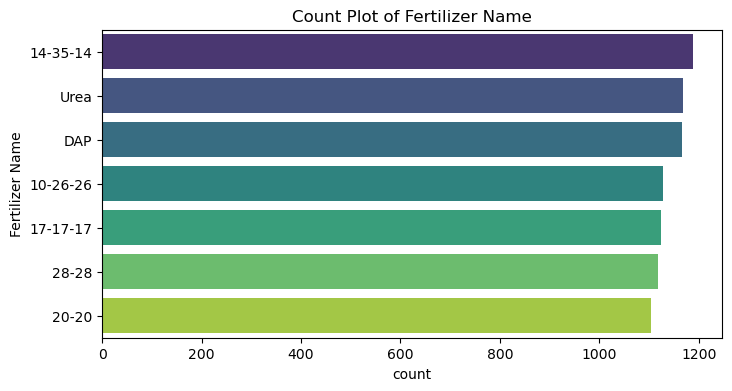

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.show()


In [13]:
from scipy.stats import zscore

# Z-score method
z_scores = np.abs(zscore(df.select_dtypes(include=['number'])))
df_outliers_removed = df[(z_scores < 3).all(axis=1)]
print(f"Rows before: {df.shape[0]}, Rows after removing outliers: {df_outliers_removed.shape[0]}")


Rows before: 7998, Rows after removing outliers: 7905


In [14]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df.select_dtypes(include=['number']))

df.head()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,Soil Type_Sandy,...,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat,Fertilizer Name_14-35-14,Fertilizer Name_17-17-17,Fertilizer Name_20-20,Fertilizer Name_28-28,Fertilizer Name_DAP,Fertilizer Name_Urea
0,-0.968728,-0.881646,-0.443003,1.567420,-0.712920,-1.398022,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,-0.298846,-0.881646,0.112698,-0.542232,-0.712920,1.320341,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,0.817623,0.708054,1.462257,-0.964162,0.924992,0.867280,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.371035,0.341201,-0.760547,0.301629,-0.712920,0.112179,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
4,-0.522140,-0.637077,0.192083,1.398648,-0.712920,-1.398022,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


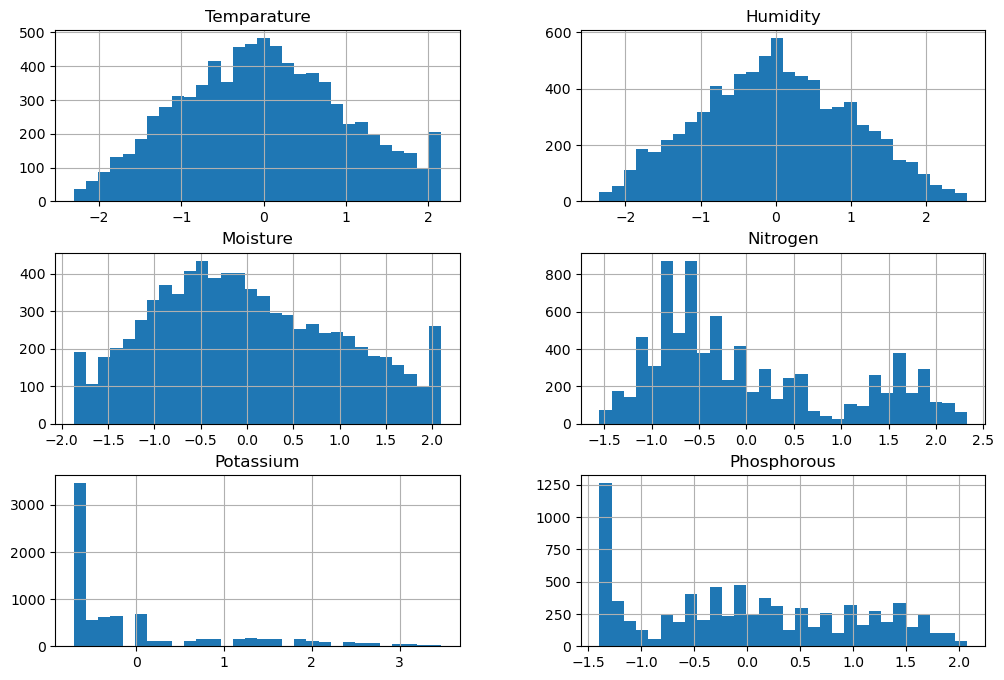

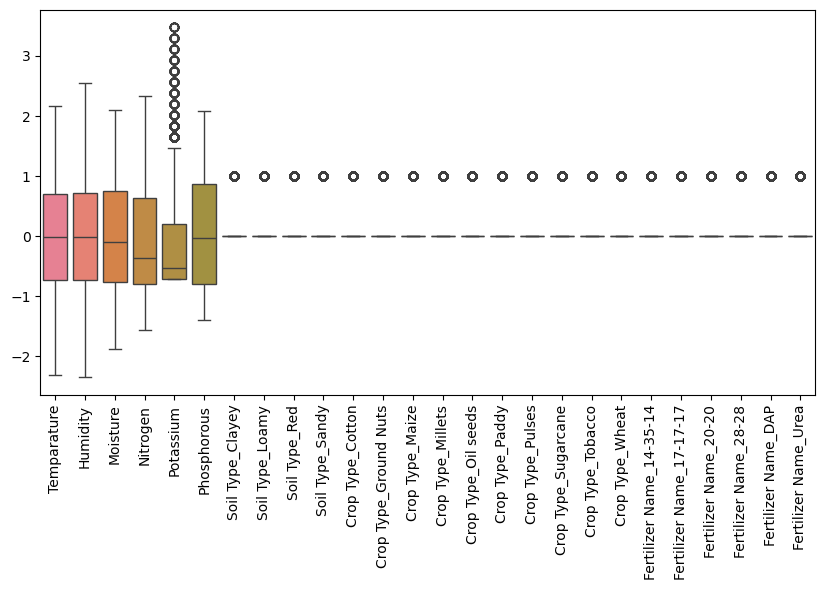

In [15]:
# Histograms for numerical columns
df.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Count plot for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(col)
    plt.show()


In [16]:
from scipy.stats import zscore

# Z-score method
z_scores = np.abs(zscore(df.select_dtypes(include=['number'])))
df_outliers_removed = df[(z_scores < 3).all(axis=1)]
print(f"Rows before: {df.shape[0]}, Rows after removing outliers: {df_outliers_removed.shape[0]}")


Rows before: 7998, Rows after removing outliers: 7905


In [17]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat', 'Fertilizer Name_14-35-14',
       'Fertilizer Name_17-17-17', 'Fertilizer Name_20-20',
       'Fertilizer Name_28-28', 'Fertilizer Name_DAP', 'Fertilizer Name_Urea'],
      dtype='object')

In [18]:
def bar_plot(variable):
    var=df[variable]
    varValue=var.value_counts()
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable,varValue))

In [19]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy', 'Crop Type_Cotton', 'Crop Type_Ground Nuts',
       'Crop Type_Maize', 'Crop Type_Millets', 'Crop Type_Oil seeds',
       'Crop Type_Paddy', 'Crop Type_Pulses', 'Crop Type_Sugarcane',
       'Crop Type_Tobacco', 'Crop Type_Wheat', 'Fertilizer Name_14-35-14',
       'Fertilizer Name_17-17-17', 'Fertilizer Name_20-20',
       'Fertilizer Name_28-28', 'Fertilizer Name_DAP', 'Fertilizer Name_Urea'],
      dtype='object')

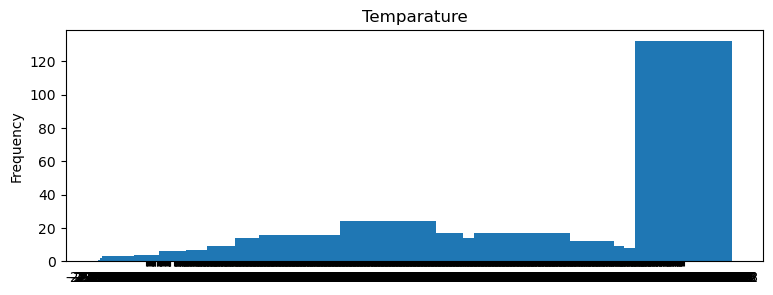

Temparature: 
Temparature
 2.157386    132
-0.298846     24
 0.817623     17
-0.075552     17
-0.968728     16
            ... 
-1.629677      1
-2.105293      1
 2.079233      1
-1.866369      1
 2.021176      1
Name: count, Length: 1816, dtype: int64


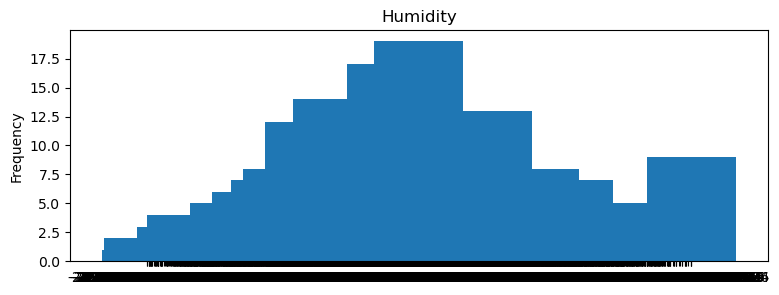

Humidity: 
Humidity
 0.096631    19
-0.147938    17
-0.637077    14
 0.341201    13
 0.708054    13
             ..
-1.873374     1
-1.413584     1
-0.474438     1
 0.412126     1
 1.732800     1
Name: count, Length: 3004, dtype: int64


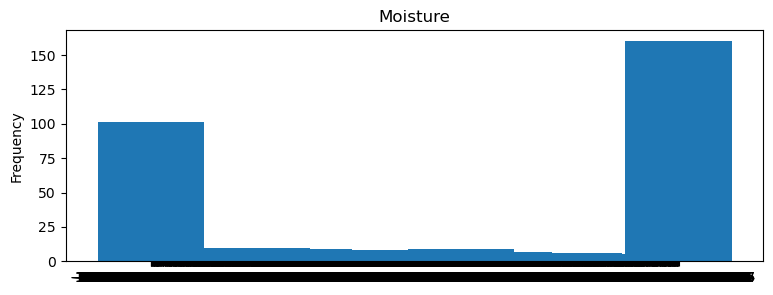

Moisture: 
Moisture
 2.097343    160
-1.871948    101
-1.078090     10
-0.760547      9
 0.463583      9
            ... 
-0.782775      1
 1.706765      1
-1.336888      1
 0.220662      1
-0.599393      1
Name: count, Length: 3723, dtype: int64


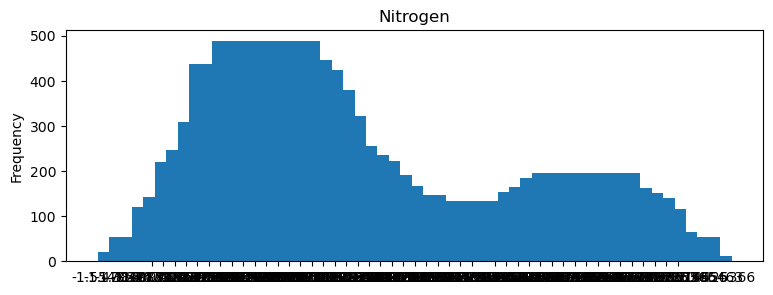

Nitrogen: 
Nitrogen
-0.711004    488
-0.626618    446
-0.879776    437
-0.795390    435
-0.542232    424
-0.457846    380
-0.373460    323
-0.964162    309
-0.289073    255
-1.048548    246
-0.204687    235
-0.120301    222
-1.132934    221
 1.651806    195
-0.035915    192
 1.567420    185
 0.048471    168
 1.483034    165
 1.736192    163
 1.398648    154
 1.820578    152
 0.217243    148
 0.132857    144
-1.217320    142
 1.904965    140
 0.639173    133
 0.301629    133
 0.554787    132
 0.470401    130
-1.301706    121
 1.989351    116
 0.386015    115
 1.314262    106
 1.229876     94
 0.723559     70
 2.073737     65
 1.145490     57
-1.386093     54
-1.470479     53
 2.242509     53
 2.158123     49
 1.061104     47
 0.807946     41
 0.976718     28
-1.554865     21
 2.326895     11
Name: count, dtype: int64


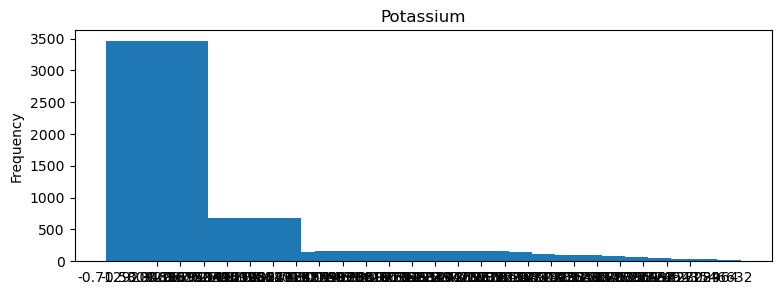

Potassium: 
Potassium
-0.712920    3458
 0.015041     685
-0.166949     637
-0.348940     618
-0.530930     562
 1.288972     167
 1.652952     163
 1.470962     163
 0.924992     162
 1.106982     159
 1.834943     152
 0.743001     148
 0.561011     117
 0.379021     108
 2.016933     107
 0.197031     104
 2.380913     100
 2.198923      96
 2.562903      77
 2.744894      70
 2.926884      52
 3.108874      38
 3.290864      37
 3.472854      18
Name: count, dtype: int64


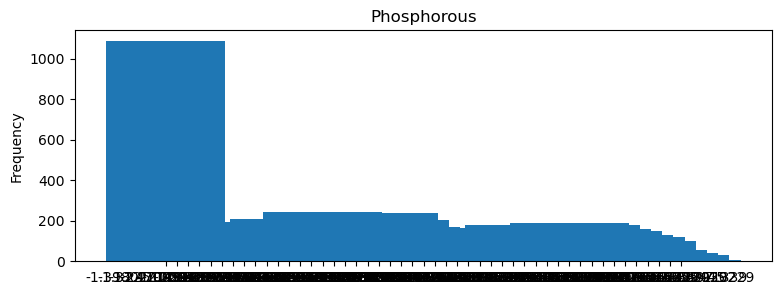

Phosphorous: 
Phosphorous
-1.398022    1085
-0.340881     241
-0.038841     240
 0.036669     239
-0.189861     237
-0.114351     232
-0.265371     218
-0.567411     210
 0.112179     203
-0.416391     201
-0.491901     197
-1.095982     195
-0.642921     191
 1.320341     190
-1.171492     182
 1.018300     181
 1.395851     180
-1.322512     176
 0.187689     171
-1.247002     171
 1.093810     167
 0.263200     162
 0.489730     157
 1.471361     157
 1.169320     150
 0.338710     150
 1.546871     149
 0.640750     147
 0.716260     141
-0.718431     140
 0.942790     137
 0.565240     136
 1.622381     132
 0.414220     129
 1.244831     126
 0.791770     120
 1.697891     118
-0.793942     113
 0.867280     105
 1.773401     100
-0.944962      71
-0.869452      60
 1.848911      58
-1.020472      52
 1.924421      43
 1.999931      32
 2.075441       6
Name: count, dtype: int64


In [22]:
numeric_columns = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
for col in numeric_columns:
    bar_plot(col)


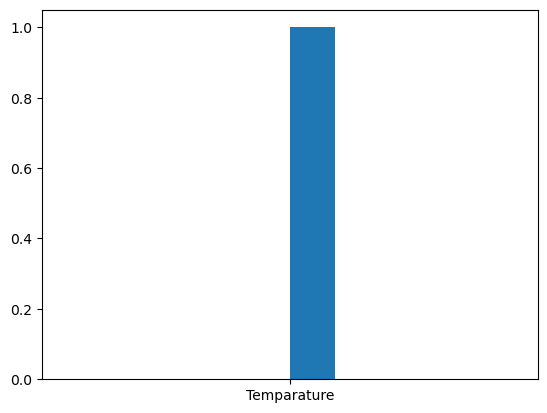

In [ ]:
columns_plot=['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']
var=plt.hist(columns_plot[0])
plt.show(var)

In [37]:
df[['Humidity','Potassium']].groupby(['Humidity'],as_index=False).mean().sort_values(by='Potassium',ascending=False)

,Humidity,Potassium
41,-2.124058,3.472854
8,-2.305039,3.472854
122,-1.910060,3.472854
124,-1.907614,3.290864
2945,2.191367,3.290864
...,...,...
2580,1.435648,-0.712920
2175,0.879253,-0.712920
2582,1.438094,-0.712920
588,-1.171460,-0.712920


<Axes: ylabel='Humidity'>

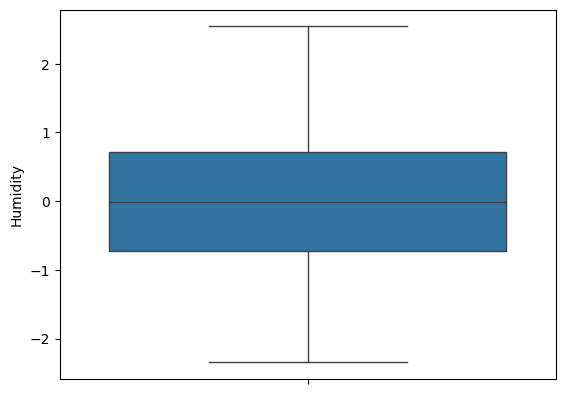

In [38]:
sns.boxplot(df['Humidity'])

In [ ]:
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           2
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [ ]:
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mode()[0])

In [ ]:
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           2
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

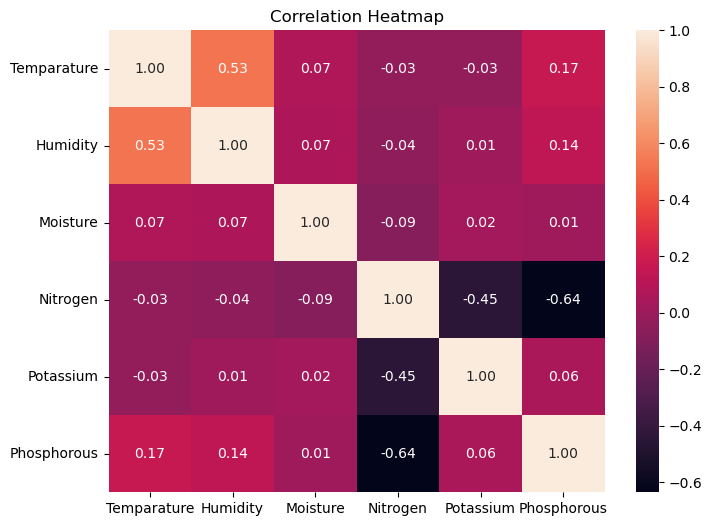

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns and handling missing values
numeric_df = df.select_dtypes(include=['number']).dropna()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()